# Relatório de Análise VII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14, 6))

In [2]:
dados = pd.read_csv("dados/residencias.csv", sep=";")

<AxesSubplot:>

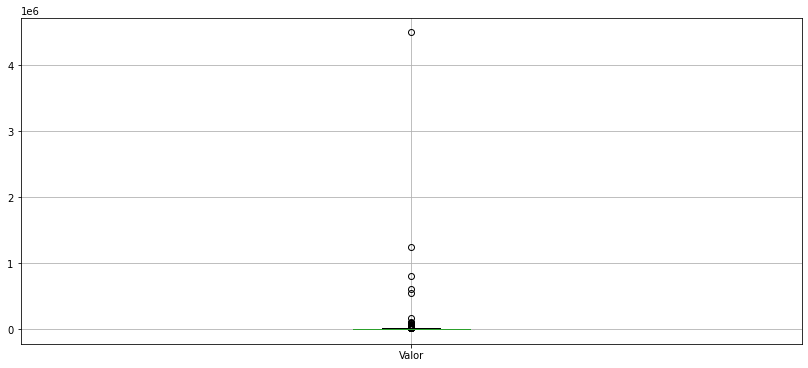

In [4]:
dados.boxplot("Valor")

In [6]:
dados[dados["Valor"] > 1e5]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m^2,Tipo Agregado
7799,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10870,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12944,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14148,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15856,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento
21875,Apartamento,Barra da Tijuca,4,3,4,403,160000.0,3714.0,2000.0,397.02,Apartamento


In [7]:
valor = dados["Valor"]

In [9]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [23]:
selecao = (valor > limite_inferior) & (
    valor < limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

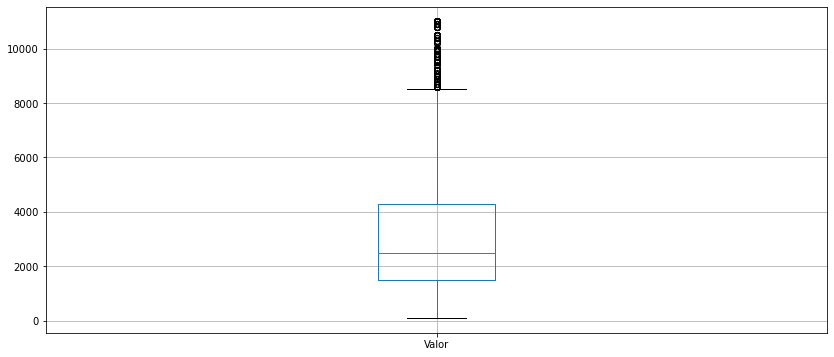

In [19]:
dados_new.boxplot("Valor")

<AxesSubplot:>

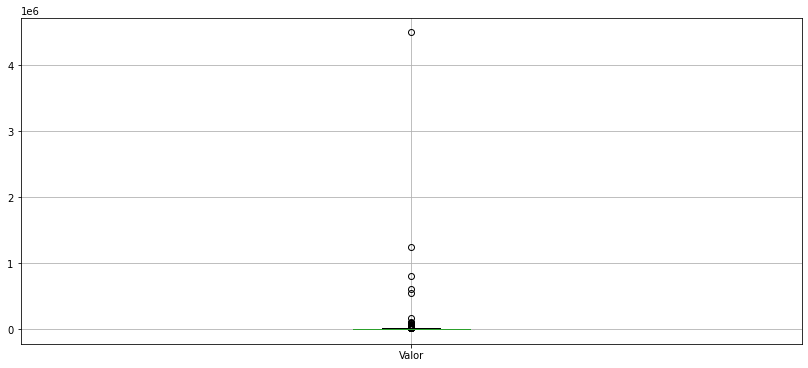

In [20]:
dados.boxplot("Valor")

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

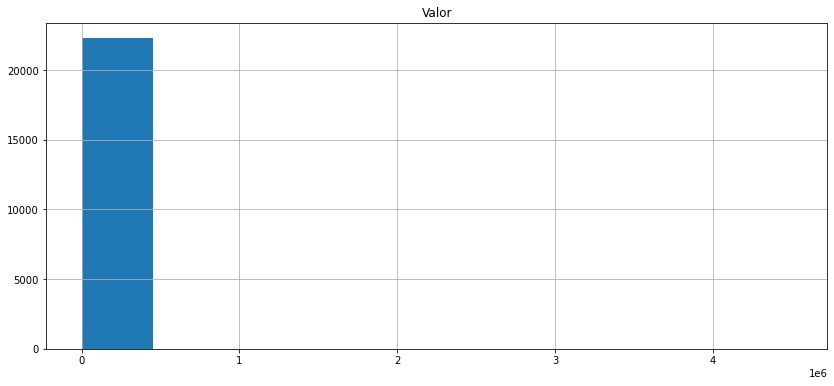

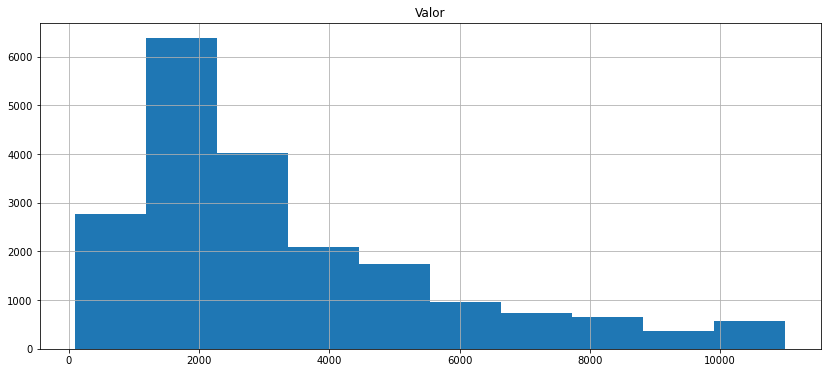

In [22]:
dados.hist(["Valor"])
dados_new.hist(["Valor"])

## Removendo outliers por grupo

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

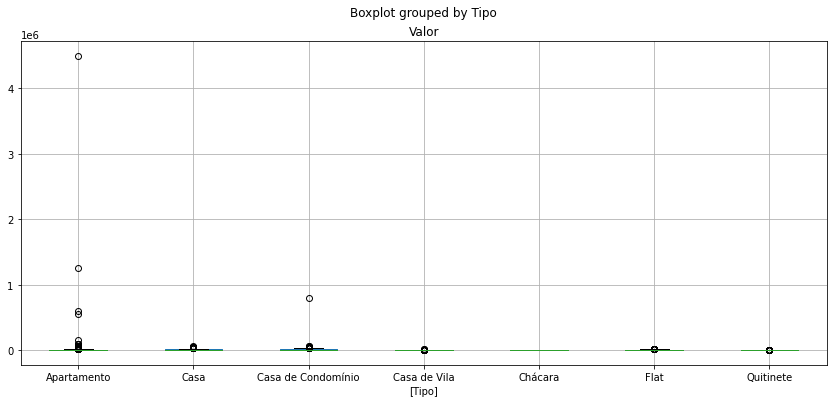

In [25]:
dados.boxplot(["Valor"], by=["Tipo"])

In [27]:
grupo_tipo = dados.groupby("Tipo")["Valor"]

In [28]:
grupo_tipo

In [30]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [31]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Chácara               4900.0
Flat                  2500.0
Quitinete              900.0
Name: Valor, dtype: float64

In [32]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Chácara                4900.0
Flat                   6000.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [47]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados["Tipo"] == tipo
    eh_dentro_limite = (dados["Valor"] > limite_inferior[tipo]) & (
                            dados["Valor"] < limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

In [48]:
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m^2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22162,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
22204,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
22225,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
22292,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

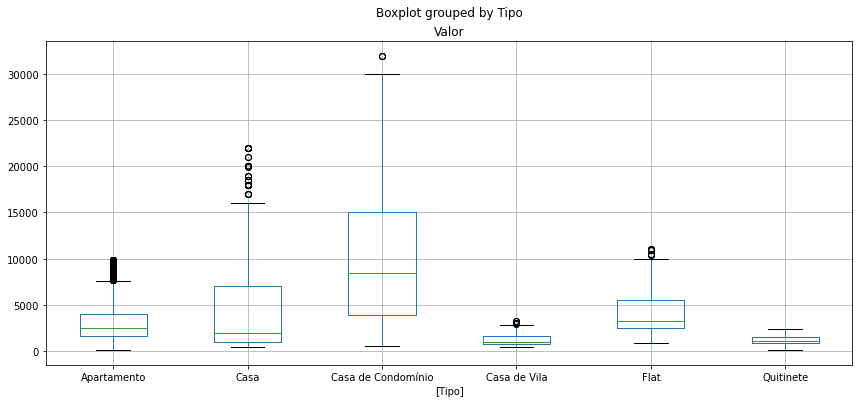

In [49]:
dados_new.boxplot(["Valor"], by=["Tipo"])

In [50]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)